# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Importing Essential Libraries

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer # vectorizers for creating the document-term-matrix (DTM)
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #wordclouds
import datetime as dt
import missingno as msno
%matplotlib inline

#to suppress warnings
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing Data Set

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
netflix_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [5]:
# checking top 5 records of Netflix Movies and Tv shows df
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Checking bottom 5 records of Netflix Movies and Tv shows df
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


# Data Summary



*   show_id : Unique ID for every Movie / Tv Show

*   type : Identifier - A Movie or TV Show

*   title : Title of the Movie / Tv Show

*   director : Director of the Movie
*   cast : Actors involved in the movie / show

*   country : Country where the movie / show was produced

*   date_added : Date it was added on Netflix

*   release_year : Actual Releaseyear of the movie / show

*   rating : TV Rating of the movie / show

*   duration : Total Duration - in minutes or number of seasons

*   listed_in : Genere

*   description: The Summary description





# Data Cleaning

In [ ]:
# Checking data columns, unique values
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# Total number of rows and columns
print ("Rows     : " ,netflix_df.shape[0])
print ("Columns  : " ,netflix_df.shape[1])

Rows     :  7787
Columns  :  12


In [ ]:
# The product of Numbers of rows and columns present in Data set
netflix_df.size

93444

In [ ]:
# Checking Types of Data
netflix_df.dtypes.to_frame(name = 'Types of Data')

,Types of Data
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
# Concise summary of the dataframe
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Getting the unique value count of each feature
netflix_df.nunique().to_frame(name = 'Unique Values')

,Unique Values
show_id,7265
type,2
title,7265
director,3930
cast,6465
country,681
date_added,1495
release_year,72
rating,14
duration,210


In [6]:
netflix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix_df['country'].replace(np.nan, 'United States',inplace  = True)
netflix_df['cast'].replace(np.nan, 'missing info',inplace  = True)

In [ ]:
# Display the two types of netflix records
netflix_df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
# Display the unique ratings available in the dataset
netflix_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [7]:
# Renaming the rating values to it's actual meanings
rating_info = {'TV-MA':'Adults', 
                'R':'Adults',
                'PG-13':'Teens',
                'TV-14':'Young Adults',
                'TV-PG':'Older Kids',
                'NR':'Adults',
                'TV-G':'Kids',
                'TV-Y':'Kids',
                'TV-Y7':'Older Kids',
                'PG':'Older Kids',
                'G':'Kids',
                'NC-17':'Adults',
                'TV-Y7-FV':'Older Kids',
                'UR':'Adults'}
# Storing it in a new variable
netflix_df['rating_new'] = netflix_df['rating'].replace(rating_info)

In [40]:
# Maturity level wise rating for tv and movies 
netflix_df['rating_new'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [ ]:
# Some statistical properties of numerical features in data frame
netflix_df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


There not much numerical columns to describe.

The oldest movie in Netflix released in the year 1925 and the latest movie released in 2021.

In [ ]:
# Checking the duplicate values
# Storing the total duplicated values in the dataset in a variable
duplicate_value = netflix_df.duplicated().sum()
print('Total duplicated values in the dataset are:', duplicate_value)

Total duplicated values in the dataset are: 0


there are no duplicate values in the dataset.

In [ ]:
# Checking null values
netflix_df.isnull().sum().to_frame(name = 'Null Values')

,Null Values
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


<Figure size 7200x216 with 0 Axes>

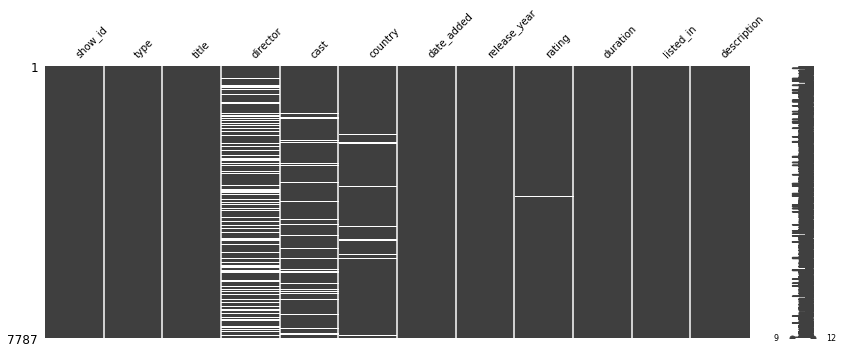

In [ ]:
# Visualize missing values as a matrix
plt.figure(figsize=(100,3))
msno.matrix(netflix_df, figsize=(14,5), fontsize=10)

There are:

2389 nulls in 'director',

718 in 'cast',

507 in 'country',

10 in 'date_added',

and 7 in 'rating'.

In [9]:
netflix_df['rating'].value_counts()

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
netflix_df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

### Treating Null/Missing values

**Director** - Director column has more then 2000 null values.

**Cast** - cast column has too many different values and more than 700 values are missing, so there is no need to keep it but we are keeping it to perform EDA.

**Date** - there are few missing values for date column. so, lets drop missing value rows.

**Country & Rating** - As there are some missing values, so, lets drop missing value rows for these two columns too.

In [8]:
netflix_df['director'] = netflix_df['director'].replace(np.nan, 'No Data')
netflix_df['cast'] = netflix_df['cast'].replace(np.nan, 'No Data')
# Dropped missing values from Country, date added and rating
netflix_df = netflix_df.dropna(subset=['country', 'date_added', 'rating'])

In [ ]:
# Checking unique values for country column for each movie/tv show
netflix_df['country'].unique()[:70]

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, United St

In [9]:
# So extracting only first country
netflix_df['country_new'] = netflix_df['country'].apply(lambda x: x.split(",")[0])

In [ ]:
# Now Checking & Verifying the null values
netflix_df.isnull().sum().to_frame(name = 'Null Values')

,Null Values
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [10]:
# Changing dtypes for date columns
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'])

In [11]:
# Adding new features for year and month values
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [12]:
# Creating separate dataframes for Movies and TV shows
netflix_movies_df = netflix_df[netflix_df['type']=='Movie']
netflix_shows_df = netflix_df[netflix_df['type']=='TV Show']
print(netflix_movies_df.shape)
print(netflix_shows_df.shape)

(5377, 16)
(2400, 16)


# Exploratory Data Analysis

As we can see that, there are multiple country values for each movie/tv show.

### **What type content is available in different countries?**

Number of Movies is :  5377
Number of TV Shows is :  2400
------------------------------------------------------------


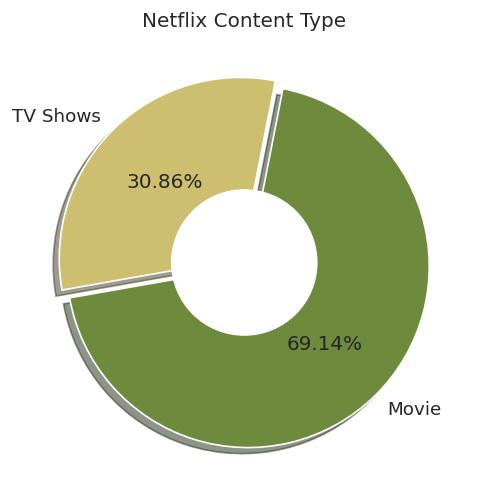

In [46]:
print("Number of Movies is : ", len(netflix_movies_df))
print("Number of TV Shows is : ", len(netflix_shows_df))
print('-' * 60)
# Using Donut chart to visualize Netflix Content Types
sns.set(rc={"figure.dpi":120})
plt.figure(figsize=(10, 5))
labels=['Movie', 'TV Shows']
plt.pie(netflix_df["type"].value_counts(), labels=labels, explode=[0.03,0.03], shadow=True, autopct='%1.2f%%', colors=['#6E8B3D', '#CDBE70'], startangle=190)
plt.title('Netflix Content Type')
circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

It can be seen that, there are more movies on Netflix than TV shows. Netflix has 5377 movies, and 2400 TV shows, where movies' quantity is more than double the quantity of TV shows.

As we can see from the donut chart, There are about 70% movies and 30% TV shows on Netflix.

      Country_Name  Movies_Count
0    United States          2330
1            India           883
2   United Kingdom           341
3           Canada           175
4           France           137
5            Spain           119
6            Egypt            93
7           Mexico            79
8           Turkey            78
9            Japan            75
10       Indonesia            74
11       Hong Kong            74
12     Philippines            74
13         Germany            68
14         Nigeria            63
15       Australia            56
16          Brazil            52
17       Argentina            50
18           China            48
19     South Korea            42
--------------------------------------------------------------------------------------------------------------------------------------------


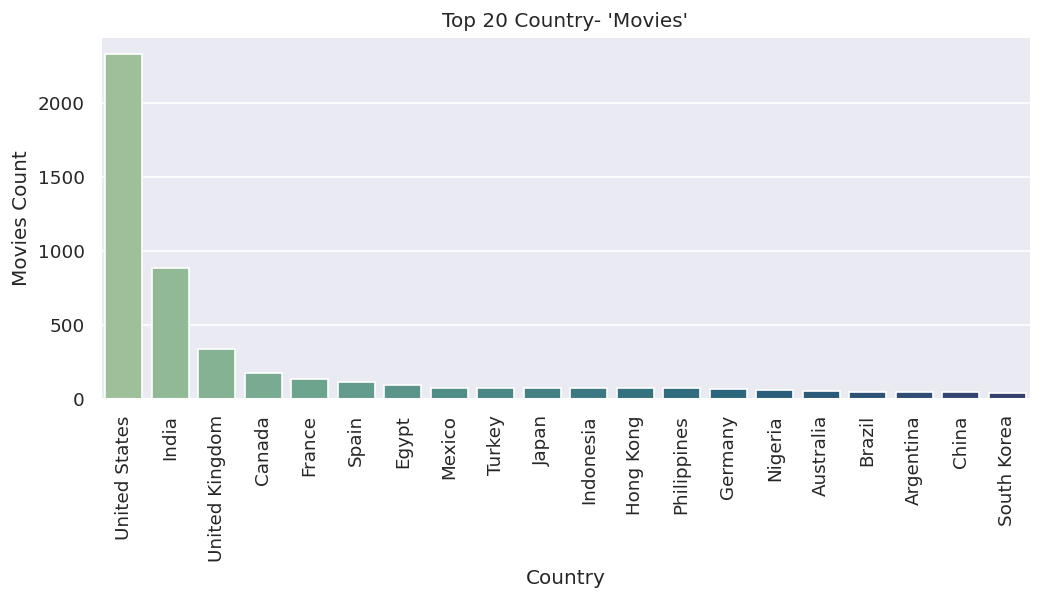

In [47]:
# Country wise movies of Netflix
country_count_movies_df = netflix_movies_df['country_new'].value_counts().reset_index()
country_count_movies_df.rename({'index': 'Country_Name', 'country_new': 'Movies_Count'}, axis=1, inplace=True)
print(country_count_movies_df[:20])
print('-' * 140)
# Plotting the countplot
plt.figure(figsize=(10,4))
sns.countplot(x = 'country_new', order = netflix_movies_df.country_new.value_counts().index[:20], palette = 'crest', data = netflix_movies_df)
plt.title("Top 20 Country- 'Movies'")
plt.xlabel('Country')
plt.ylabel('Movies Count')
plt.xticks(rotation=90)
plt.show()

      Country_Name  TV_Shows_Count
0    United States            1053
1   United Kingdom             235
2            Japan             161
3      South Korea             152
4           Canada              84
5            India              73
6           Taiwan              70
7           France              59
8        Australia              51
9            Spain              49
10          Mexico              44
11           China              38
12          Turkey              28
13          Brazil              27
14         Germany              24
15        Colombia              23
16        Thailand              22
17       Singapore              18
18       Argentina              18
19           Italy              17
--------------------------------------------------------------------------------------------------------------------------------------------


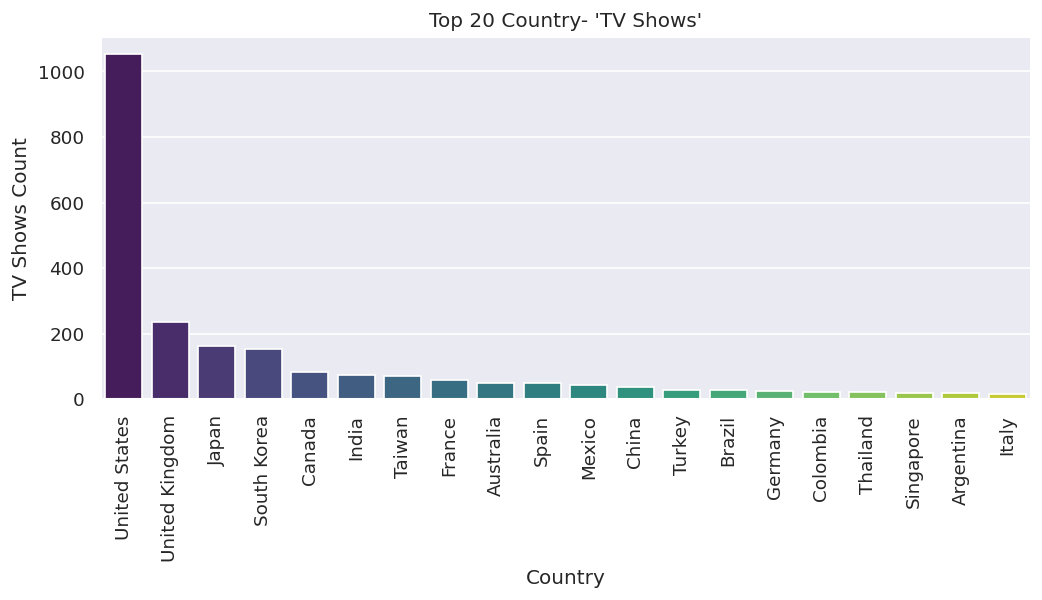

In [48]:
# Country wise TV Shows of Netflix
country_count_TV_Shows_df = netflix_shows_df['country_new'].value_counts().reset_index()
country_count_TV_Shows_df.rename({'index': 'Country_Name', 'country_new': 'TV_Shows_Count'}, axis=1, inplace=True)
print(country_count_TV_Shows_df[:20])
print('-' * 140)
# Plotting the countplot
plt.figure(figsize=(10,4))
sns.countplot(x = 'country_new', order = netflix_shows_df.country_new.value_counts().index[:20], palette = 'viridis', data = netflix_shows_df)
plt.title("Top 20 Country- 'TV Shows'")
plt.xlabel('Country')
plt.ylabel('TV Shows Count')
plt.xticks(rotation=90)
plt.show()

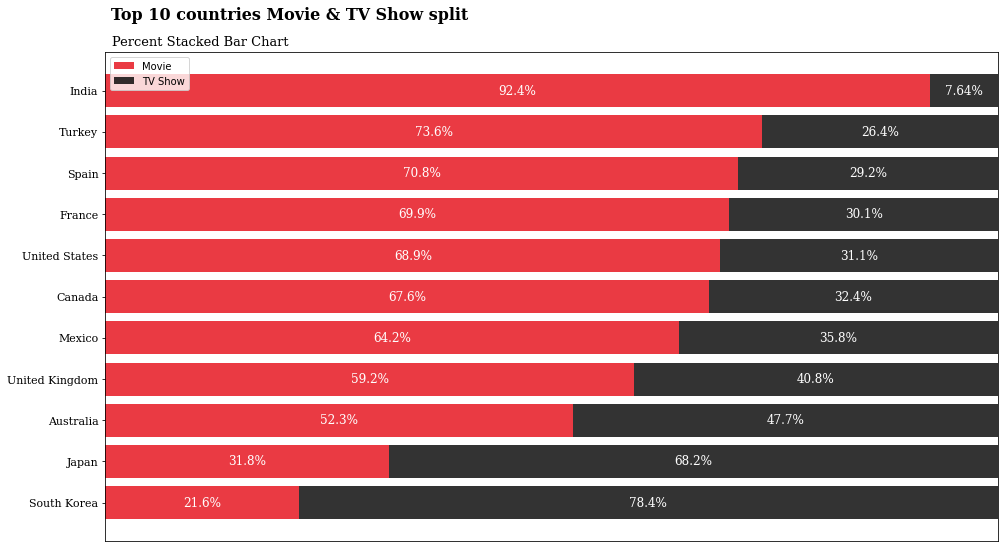

In [34]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split

# Lets retrieve just the first country
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

country_order = netflix_df['principal_country'].value_counts()[:11].index
content_data = netflix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(16, 9),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='#e50914', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='#000000', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(content_data_ratio.index, fontfamily='serif', fontsize=11)

# Addind Annotaion
for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['Movie'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')

for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['TV Show'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]+content_data_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize = 16, 
        fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=13,fontfamily='serif')   
plt.legend()
plt.show()

As we came to know, the United States seems to have the most number of tv shows and movies as it's the origin country followed by India, United Kingdom, and Canada.

In [51]:
# Distribution for ratings with content type correspondingly using plotly
df1 = netflix_df[netflix_df["type"] == "TV Show"]
df2 = netflix_df[netflix_df["type"] == "Movie"]
temp_df1 = df1['rating_new'].value_counts().reset_index()
temp_df2 = df2['rating_new'].value_counts().reset_index()

# Creating trace 1
trace1 = go.Bar(x = temp_df1['index'], y = temp_df1['rating_new'], name="TV Shows",
                marker = dict(color = 'gold', line=dict(color='rgb(0,0,0)',width=1.5)))
# Creating trace 2 
trace2 = go.Bar(x = temp_df2['index'], y = temp_df2['rating_new'], name = "Movies",
                marker = dict(color = 'tomato', line=dict(color='rgb(0,0,0)',width=1.5)))

# Plotting trace 1 & trace 2
layout = go.Layout(autosize=False, width=1000, height=500,template= "plotly_dark",title = 'RATING DISTRIBUTION BY CONTENT TYPE' , xaxis = dict(title = 'Rating & Content type'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

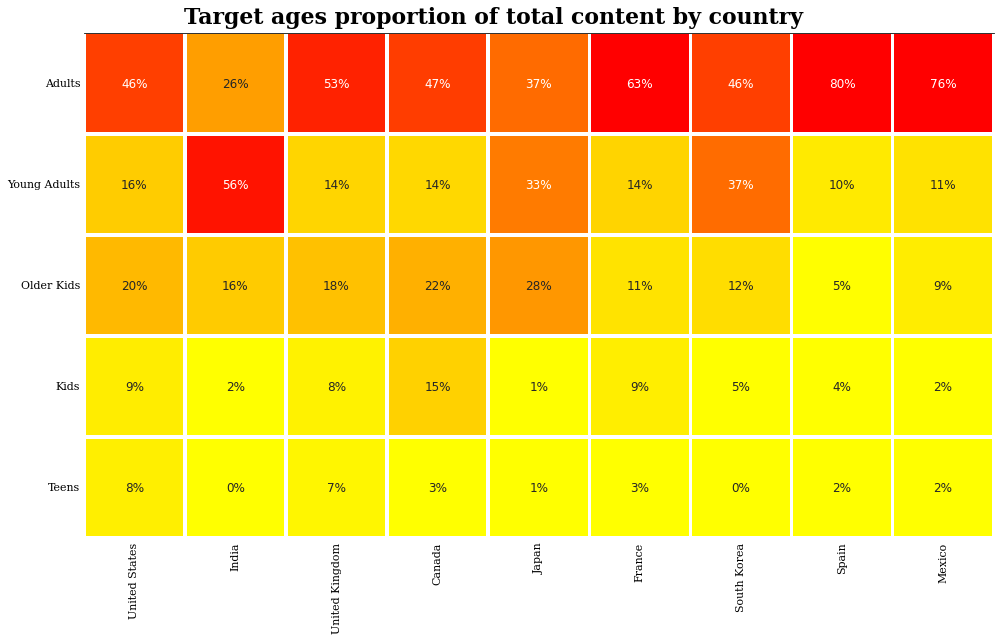

In [36]:
# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']
netflix_df_heatmap = netflix_df.loc[netflix_df['principal_country'].isin(data)]
netflix_df_heatmap = pd.crosstab(netflix_df_heatmap['principal_country'], netflix_df_heatmap['rating_new'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 13))

country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']

age_order = ['Adults', 'Young Adults','Older Kids', 'Kids', 'Teens']

sns.heatmap(netflix_df_heatmap.loc[age_order,country_order],cmap="autumn_r",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.80, .780, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=22,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

                                                    Count of Listed In
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
...                                                                ...
Anime Series, Crime TV Shows, TV Thrillers                           1
Crime TV Shows, Romantic TV Shows, Spanish-Lang...                   1
Crime TV Shows, International TV Shows, Reality TV                   1
International Movies, Romantic Movies, Sci-Fi &...                   1
International TV Shows, Spanish-Language TV Sho...                   1

[491 rows x 1 columns]
------------------------------------------------------------------------------------------------------------------------


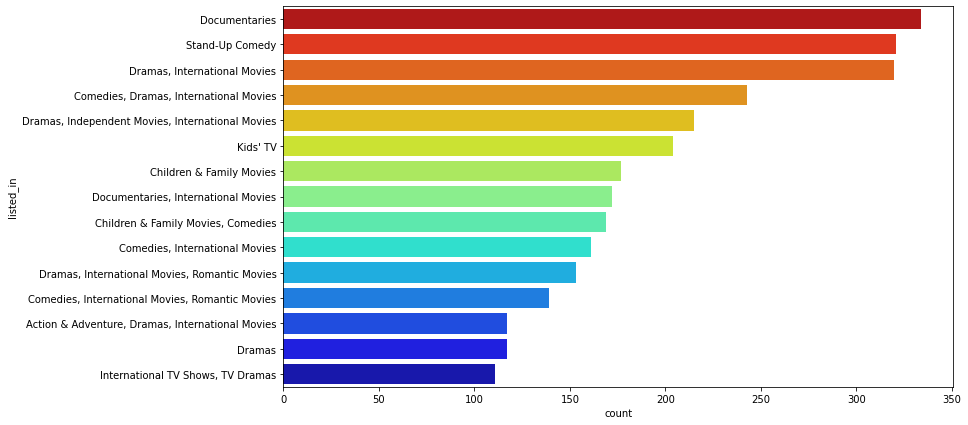

In [37]:
# Checking number of netflix shows/movies with respect to the genres
print(netflix_df['listed_in'].value_counts().to_frame(name = 'Count of Listed In'))
print('-'*120)
# Plotting the genre details of the dataset
plt.figure(figsize = (12, 7))
sns.countplot(data = netflix_df, y = 'listed_in', palette = 'jet_r', order = netflix_df['listed_in'].value_counts().index[: 15])
plt.show()

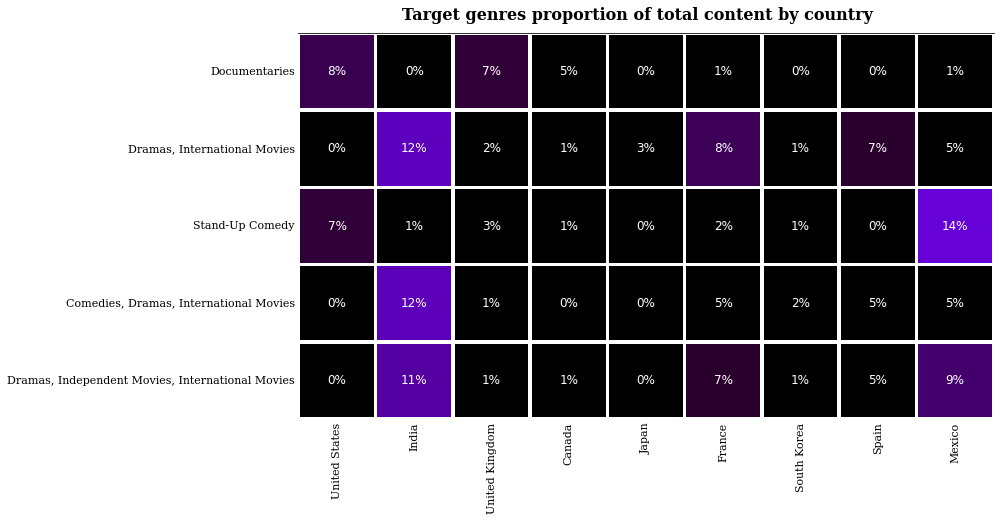

In [42]:
# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']
netflix_df_heatmap = netflix_df.loc[netflix_df['principal_country'].isin(data)]
netflix_df_heatmap = pd.crosstab(netflix_df_heatmap['principal_country'], netflix_df_heatmap['listed_in'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 13))

country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']

listedin_order = ['Documentaries', 'Dramas, International Movies', 'Stand-Up Comedy', 'Comedies, Dramas, International Movies', 'Dramas, Independent Movies, International Movies']

sns.heatmap(netflix_df_heatmap.loc[listedin_order,country_order],cmap='gnuplot',square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.87, .720, 'Target genres proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=16,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

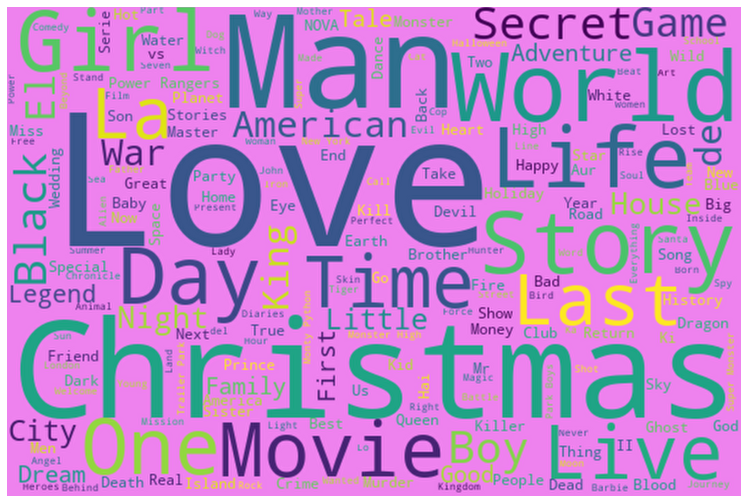

In [43]:
# Analysis on title column
plt.figure(figsize= (17, 9))
title_words = " ".join(word for word in netflix_df['title'])
stopwords = set(STOPWORDS)

# Generating a word cloud image with most used titles
title_cloud = WordCloud(stopwords=stopwords, background_color="violet",width=600, height=400).generate(title_words)
plt.imshow(title_cloud, interpolation='bessel')
plt.axis("off")
plt.show()

It can be seen that, Love, Christmas, World, Girl and Man are the most utilized words for movie titles through the word cloud figure.

And hence, it can be inferred from the above words that there are more movies/tv shows of the romatic genre and also christmas movies/tv shows.

### **Is Netflix has increasingly focusing on TV rather than movies in recent years?**

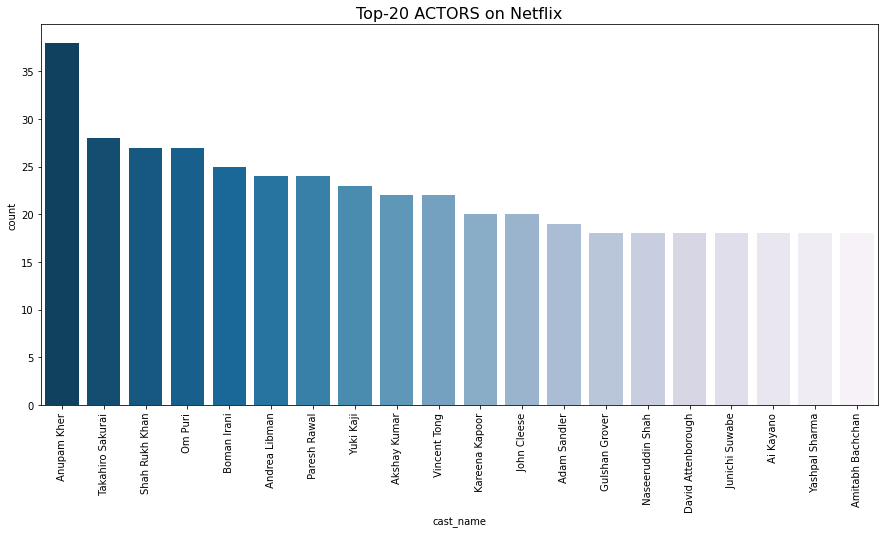

In [44]:
# Top 20 actors netflix
netflix_df['cast_name'] = netflix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

data_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
                               columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,7))
sns.barplot(x='cast_name',y='count',data=data_cast_count,palette="PuBu_r")
plt.title("Top-20 ACTORS on Netflix",fontsize='16')
plt.xticks(rotation=90)
plt.show()

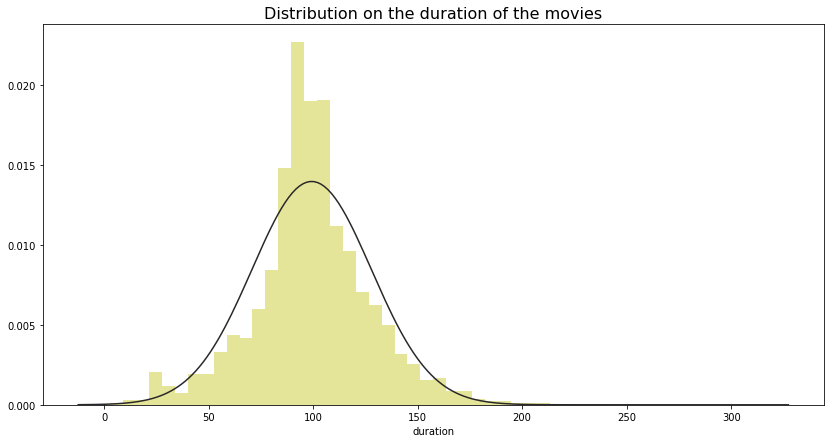

In [45]:
# Checking distribution on the duration of the movies
duration_movie = netflix_df[netflix_df["type"] == "Movie"]['duration'].str.rstrip('min').astype('int')
plt.figure(figsize= (14, 7))
sns.distplot(duration_movie, fit = norm, kde = False, color = 'y')
plt.title("Distribution on the duration of the movies",fontsize='16')
plt.show()

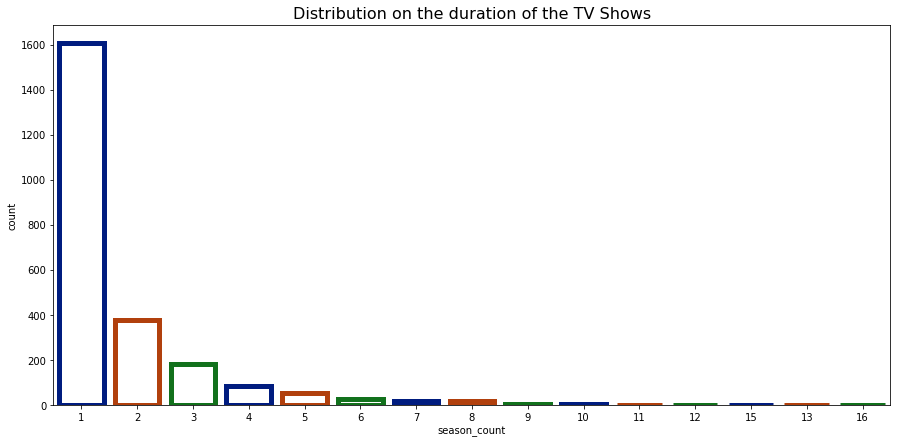

In [46]:
# Checking distribution on the duration of the TV Shows
netflix_df['season_count'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
duration_show = netflix_df[netflix_df["type"] == "TV Show"]['season_count']
total = float(len(duration_show))
plt.figure(figsize= (15, 7))
ax = sns.countplot(x = duration_show, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3), order = duration_show.value_counts().index)
plt.title("Distribution on the duration of the TV Shows",fontsize='16')
plt.show()

Here, Most of the streamed TV Shows seems to have only one season. Shows that go beyond 3 season are very less in number compared to single season TV Shows. 

### Hypothesis Testing

      TV Show Added Count
2020                  697
2019                  656
2018                  430
2017                  361
2016                  185
2015                   30
2021                   29
2014                    6
2013                    5
2008                    1
----------------------------------------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Proportion of Movies & TV Shows added from year 2011 to 2021')

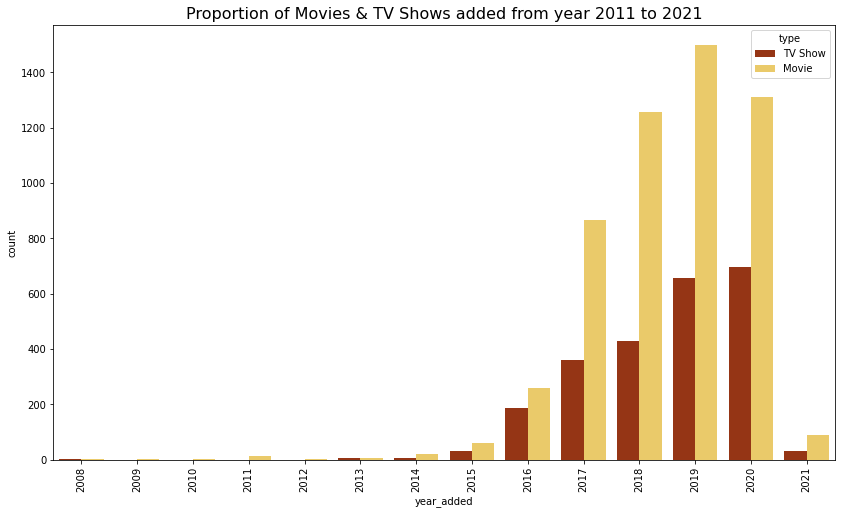

In [14]:
# Checking counts of tv shows streamed during th eyears 2010 to 2021
recent_years_added_tv = netflix_df[netflix_df['type'] == 'TV Show']
print(recent_years_added_tv.year_added.value_counts().to_frame(name = 'TV Show Added Count'))
print('-'*130)
# Checking overall year_added analysis for both TV Shows & Movies through countplot
plt.figure(figsize=(14,8))
sns.countplot(netflix_df["year_added"],hue=netflix_df["type"],palette = "afmhot")
plt.xticks(rotation = 90)
plt.title("Proportion of Movies & TV Shows added from year 2011 to 2021",fontsize='16')

*   ***Hypothesis:*** The number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled.
*   ***Inference:*** As seen above, the number of TV shows has tripled since 2010. But there is no decline in the number of movies streamed. So we can conclude that the above hypothesis is rejected though partially true



# Feature Engineering

In [52]:
new_netflix_df = netflix_df.copy()

In [53]:
new_netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_new,country_new,year_added,month_added,count,principal_country,cast_name,season_count
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,Brazil,2020,8,1,Brazil,"[João Miguel, Bianca Comparato, Michel Gomes...",4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,Mexico,2016,12,1,Mexico,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,Singapore,2018,12,1,Singapore,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,United States,2017,11,1,United States,"[Elijah Wood, John C. Reilly, Jennifer Conne...",
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,United States,2020,1,1,United States,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",


In [54]:
new_netflix_df= new_netflix_df.drop(columns='director',axis=1)

In [55]:
new_netflix_df = new_netflix_df[new_netflix_df['date_added'].notna()]

In [56]:
new_flix_df = new_netflix_df.drop(columns=['show_id', 'title', 'cast', 'date_added', 'description', 'rating_new', 'country_new', 'count',	'principal_country', 'cast_name', 'season_count'],axis=1)
new_flix_df

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,TV Show,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8
1,Movie,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78 min,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123 min,Dramas,2020,1
...,...,...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,9
7785,TV Show,Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,10


In [57]:
new_flix_df['duration']=new_flix_df['duration'].str.replace('Season','')
new_flix_df['duration']=new_flix_df['duration'].str.replace('s','')
new_flix_df['duration']=new_flix_df['duration'].str.replace('min','')

new_flix_df['duration']=new_flix_df['duration'].astype(str).astype(int)
new_flix_df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

In [58]:
new_flix_df.head(5)

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,TV Show,Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1


In [59]:
# Applying label encoder to the features
le = LabelEncoder()
new_flix_df["type"] = le.fit_transform(new_flix_df["type"])
new_flix_df["country"] = le.fit_transform(new_flix_df["country"])
new_flix_df['rating'] = le.fit_transform(new_flix_df['rating'])
new_flix_df['listed_in'] = le.fit_transform(new_flix_df['listed_in'])

### Text Cleaning

In [60]:
# Combining genre and description column 
text_df = new_netflix_df['listed_in'] + new_netflix_df['description']

# Creating fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

# Appling the function to clean text
new_text_df = text_df.apply(clean_text)
new_text_df

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7784    Documentaries International Movies Music Music...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7777, dtype: object

**EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )**

In the context of NLP, a text corpus is simply a collection of documents. And a document can be a sentence, a group of sentences , or even a phrase—depending upon the use case. 

In [61]:
# LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.
# Hence, applying vectorizer
vect =TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text=vect.fit_transform(new_text_df)

In [62]:
# Transform the data using StandardScaler
ss = StandardScaler()
flix_standarized = ss.fit_transform(new_flix_df)
flix_df_standarized = pd.DataFrame(flix_standarized, columns = new_flix_df.columns)

# Performing a PCA to visualize clusters
pca = PCA(n_components = 2)
flix_df_pca=pd.DataFrame(pca.fit_transform(flix_df_standarized))

### **Topic Modeling**

**LSA (Latent semantic analysis)**

Latent semantic analysis (LSA) is a mathematical method for computer modeling and simulation of the meaning of words and passages by analysis of representative corpora of natural text. LSA closely approximates many aspects of human language learning and understanding.

In [63]:
# Instantiating the lsa model
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)

In [64]:
# TOP-10 TOPICS ON NETFLIX
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Genre "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Genre 0: 
international shows movies dramas comedies romantic family life independent young 

 NETFLIX Genre 1: 
shows crime british spanish language korean docuseries series reality romantic 

 NETFLIX Genre 2: 
adventure action fi sci kids stand children family world series 

 NETFLIX Genre 3: 
stand special comedy comedian comic talk take family show life 

 NETFLIX Genre 4: 
family children movies shows save friend comedieswhen christmas music kids 

 NETFLIX Genre 5: 
documentaries documentary music world docuseries series moviesthis sports life international 

 NETFLIX Genre 6: 
comedies romantic friend kids love life school best series world 

 NETFLIX Genre 7: 
series kids independent docuseries dramas friend science nature anime world 

 NETFLIX Genre 8: 
horror movies fi sci romantic series reality kids thrillersa love 

 NETFLIX Genre 9: 
life docuseries young woman reality nature science family love romantic 





*  We can see that the topic modelling did the genre analysis in movies and tv shows.
*  Each topic identifies genre of movies an tv shows on netflix.



**LDA (Latent Dirichlet Allocation)**

Latent Dirichlet allocation (LDA) is a generative probabilistic model of a corpus. The basic idea is that documents are represented as random mixtures over latent topics, where each topic is characterized by a distribution over words.

In [27]:
# Instantiating the lda model
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)
vocab = vect.get_feature_names()
print("Top 10 Topics with important features")
print('-'*80)
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Top 10 Topics with important features
--------------------------------------------------------------------------------
Topic 0: 
international dramas true shows action 

Topic 1: 
music documentaries story documentary life 

Topic 2: 
shows school international high crime 

Topic 3: 
family dramas movies international comedies 

Topic 4: 
comedies dramas romantic international movies 

Topic 5: 
sci fi future scientist moviesas 

Topic 6: 
shows international movies crime horror 

Topic 7: 
documentary documentaries drama social follows 

Topic 8: 
shows spanish language romantic international 

Topic 9: 
stand comedy special comedian comic 



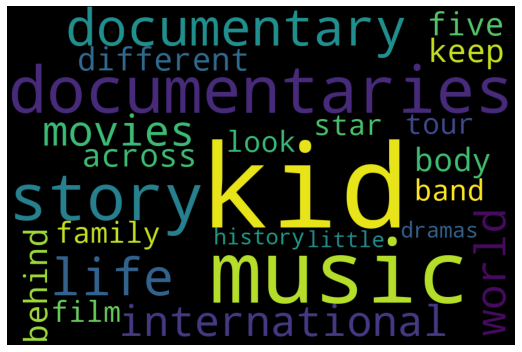

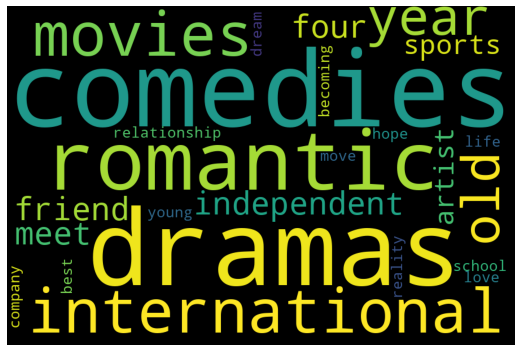

In [66]:
# Let's Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]
  
  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.subplots(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

# topic 0
draw_word_cloud(1)
draw_word_cloud(4)

As we can see from the wordcloud that from two topics one is about documentries and other is about romantic, comedies, therefore, topic modelling successfully classifies shows and movies into genre.

**Clusters Model Implementation**

In [67]:
flix_df_standarized.head(5)

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,1.496802,-2.041651,0.692231,0.492155,-1.280313,1.084506,1.085420,0.338631
1,-0.668091,-0.505346,0.235617,0.492155,0.467228,0.381066,-1.796311,1.452410
2,-0.668091,-0.099853,-0.335151,-1.052434,0.172698,0.588901,-0.355446,1.452410
3,-0.668091,0.871046,-0.563458,-1.567297,0.211969,-1.713266,-1.075878,1.173965
4,-0.668091,0.871046,-0.677611,-1.567297,1.056286,0.253168,1.085420,-1.610483


### **Affinity Propagation**

Converged after 81 iterations.
Estimated number of clusters: 13
Silhouette Coefficient: 0.244
----------------------------------------------------------------------------------------------------


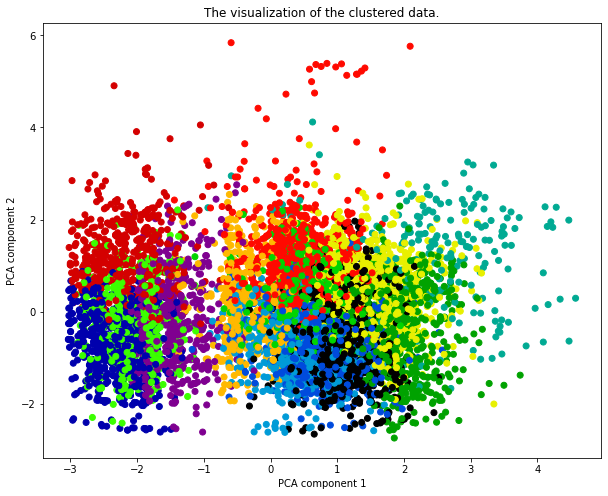

In [70]:
# Fitting the Affinity Propagation
# Using euclidean distance as affinity estimator
af = AffinityPropagation(preference = -753, damping = 0.60, verbose = True, random_state = 0).fit(flix_df_standarized) 
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(flix_df_standarized, labels, metric = 'sqeuclidean'))
print('-'*100)

colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
fig_dims = (10,8)
fig, ax = plt.subplots(figsize = fig_dims) 
plt.scatter(flix_df_pca[0], flix_df_pca[1], c = colors)
ax.set_title('The visualization of the clustered data.')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2');

Silhouette Coefficient score is 0.244 which is not that well. so we will try some diffrent clustering models.

### **Agglomerative Clustering**

In [82]:
# let's start with programimg
# Creating the Evaluation Metric
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(15, 6)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 15
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'red', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=13, fontweight='bold')

    plt.show()

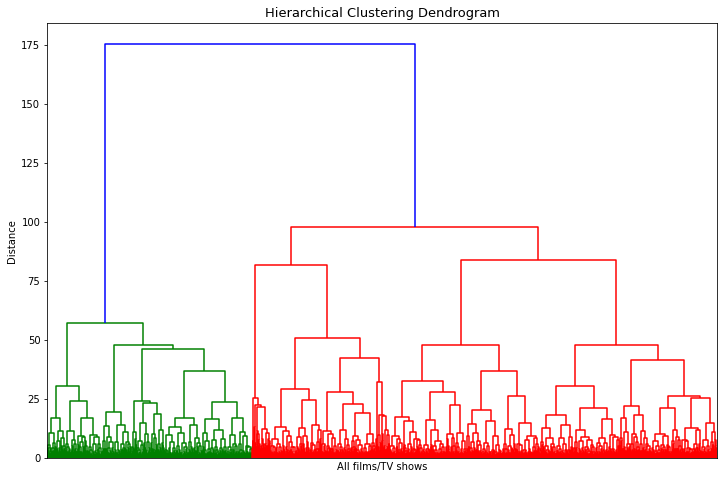

--------------------------------------------------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : 0.17296314851287742


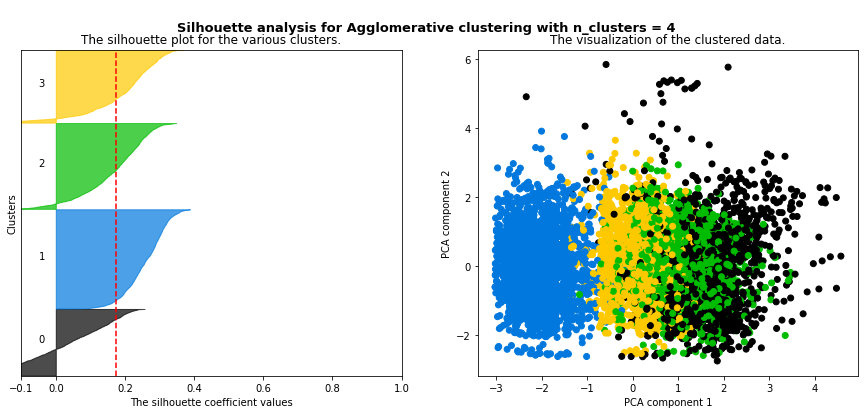

In [83]:
# Now using the dendrogram to get number of clusters.
distances_linkage = linkage(flix_df_standarized,
                            method = 'ward', 
                            metric = 'euclidean')                      
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram', fontsize=13)
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')
dendrogram(distances_linkage, no_labels = True)
plt.show()
print('-'*110)
silhouette_analysis(np.array(flix_df_standarized),flix_df_pca,[4])

### **K-MEANS Clustering**

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'